In [1]:
!ls

00_Introduction.ipynb           02_MultipixelFeatures_Solution.ipynb
00_Introduction_Solution.ipynb  Classifiers.ipynb
01_NeuralNetworks.ipynb         t-sne.ipynb
02_MultipixelFeatures.ipynb


If you don't see your `drive` folder in the output above, run the cell below to mount the drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Imports

In [41]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import glob, os
from sklearn.linear_model import LogisticRegression

## Your code here - make sure your data_dir string is the correct path for locating your data ##
data_dir='/content/drive/My Drive/AI4ALL-PCam/data/'

if(os.path.exists(data_dir)):
    print('Your path exists')

## Review

In the last section, we achieved ~70% on our test set. We can probably do better than that though. 

There is a lot of information, such as individual pixel colors, that is not captured by average pixel color. 

For example, the code below will generate two images with very similar average pixel colors which look _very_ different.

image 1 average:  [136.9  111.58 131.69]
image 2 average:  [137. 112. 132.]


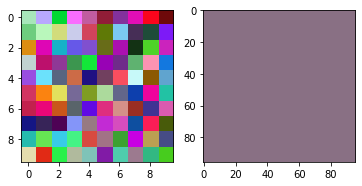

In [7]:
image1 = np.random.randint(0,255, (10,10,3))
avg = np.average(image1, axis=(0,1))
print('image 1 average: ', avg)

image2 = np.ones((96,96,3), dtype=int)*np.round(avg).astype(int)
print('image 2 average: ', np.average(image2, axis=(0,1)))
plt.subplot(121); plt.imshow(image1)
plt.subplot(122); plt.imshow(image2)
plt.show()

We can see that these two images look very different even though they have the same average pixel color.

So, now we are going to use histograms of pixel values as a feature. 

A histogram of pixel values counts how many pixels have each value (0-255). 


### Converting to grayscale

Each pixel currently has 3 values (R,G,B). To make the pixel counting easier, we want to condense the image into one channel - grayscale. 

We can calculate this image's grayscale equivalent with this formula:

    grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B
    
Implement this formula in the function below

hint 1: You can select the R, G, and B channels of the image by using `image[:,:,c]` where c is the channel number

hint 2: The channels are in the order you would expect - R, G, then B

hint 3: Remember that indices start at 0, not 1

In [8]:
def rgb_to_grayscale(image):
    ## Your code here ##
    grayscale = 
    return grayscale

Test this function on image1 from above

(10, 10)


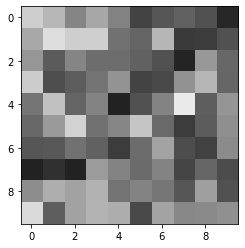

In [10]:
### Your code here ###
gray = 
##
gray = np.round(gray).astype('int')
plt.imshow(gray,cmap=plt.get_cmap('gray'), vmin=0, vmax=255); plt.show()

Now, we want to look at the distribution of intensity values between 0 and 255. We can do that using `plt.hist` and `gray.ravel()`  

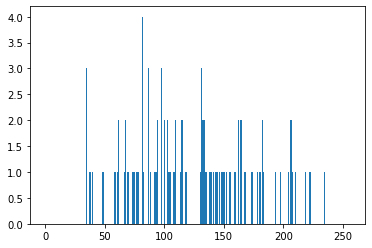

In [11]:
plt.hist(gray.ravel(),256,[0,256]); plt.show()

Now, do the same for image2

In [3]:
## Your code here ##
# Convert image2 to gray2 with rgb_to_grayscale
gray2 = 
##
plt.imshow(gray2); plt.show()
# Round gray2 and convert to integer type
gray2 = np.round(gray2).astype(int)

NameError: name 'rgb_to_grayscale' is not defined

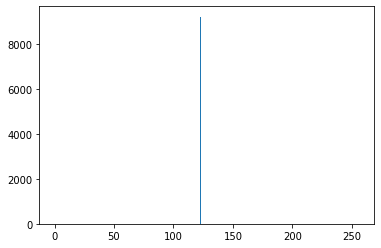

In [13]:
## Your code here ##
# Show histogram of intensity values
# Don't forget to ravel the image into a 1d array of pixels! If you do forget, the cell will run for a long time)
plt.hist() 
plt.show()

So we can see that the histograms of pixel values look different even though the average pixel value looks the same.

This method gives us 256 data points for each patch, but maybe we can group some bins together.

Instead of using all 256 bins, let's use 25

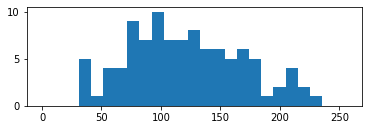

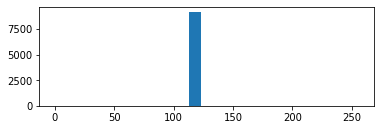

In [14]:
plt.subplot(211);
plt.hist(gray.ravel(),25,[0,256]); plt.show()
plt.subplot(212);
plt.hist(gray2.ravel(),25,[0,256]); plt.show()

Fewer features generally means less overfitting and quicker training, so we will stick with 25 bins for now.

If we want to save these features to a variable instead of plotting them, we can use `np.histogram` (`plt.hist` calls `np.histogram`under the hood)

This will output the histogram features and the bin edges. 

hint 1: We can ignore the big edges by putting a `_` as the second output variable

hint 2: Ravel the image (with `grey_image.ravel()`) before passing it and give the parameter `bins` to `np.histogram`

In [15]:
def calc_gray_hist_features(gray_image, num_bins = 25):
    ## Your code here ##
    hist, _ = 
    ##
    return hist

Test this function on gray and gray2

In [4]:
f1 = calc_gray_hist_features(gray, 25)
print('gray features: ', f1)
f2 = calc_gray_hist_features(gray2, 25)
print('gray2 features: ', f2)

NameError: name 'calc_gray_hist_features' is not defined

### Test grayscale function on PCam

Let's test this process on an image from our PCam dataset

Step 1: Convert to grayscale


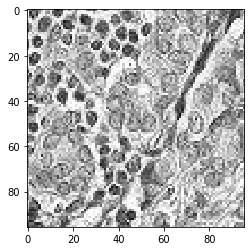

In [23]:
# Save a string containing the path to a PCam training image
image_path1 = data_dir + ''
image1 =
gray1 = 
plt.imshow(gray1, cmap='gray'); plt.show()

Step 2: View histogram of pixels

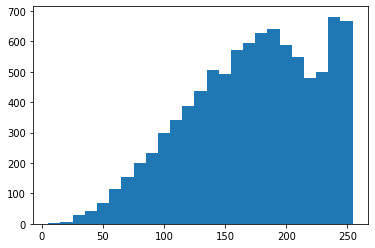

Step 3: Calculate histogram features with the function we defined (`calc_gray_hist_features`)

In [26]:
features = 
print(features)

[  4   6  28  42  70 113 155 201 234 299 342 387 436 506 494 571 596 626
 641 588 549 481 499 681 667]


## Train a classifier on histogram features

We want to follow a similar procedure to yesterday for loading the training data.

Gather all of the file directories for the train, valid, and test splits - make sure your file paths are correct

In [43]:
train_path_1 = data_dir + 'train/1/*'
train_path_0 = data_dir + 'train/0/*'
train_files_1 = glob.glob(train_path_1)
train_files_0 = glob.glob(train_path_0)
train_y = np.concatenate((np.ones(len(train_files_1)), np.zeros(len(train_files_0))))
train_images = [io.imread(f) for f in train_files_1 + train_files_0]


valid_path_1 = data_dir + 'valid/1/*'
valid_path_0 = data_dir + 'valid/0/*'
valid_files_1 = glob.glob(valid_path_1)
valid_files_0 = glob.glob(valid_path_0)
valid_y = np.concatenate((np.ones(len(valid_files_1)), np.zeros(len(valid_files_0))))
valid_images = [io.imread(f) for f in valid_files_1 + valid_files_0]

test_path_1 = data_dir + 'test/1/*'
test_path_0 = data_dir + 'test/0/*'
test_files_1 = glob.glob(test_path_1)
test_files_0 = glob.glob(test_path_0)
test_y = np.concatenate((np.ones(len(test_files_1)), np.zeros(len(test_files_0))))
test_images = [io.imread(f) for f in test_files_1+test_files_0]

Now that we've reloaded the images from yesterday, create the new feature array using `calc_gray_hist_features`

In [44]:
hist_gray_train_X = np.empty((len(train_images), 25))
for index, train_image in enumerate(train_images):
    ### Your code here ##
    gray_image = 
    hist_gray_train_X[index, :] = 
    ##

Initialize, train, and score a LogisticRegression classifier on the training set - Review the Introduction notebook for help on this one

In [45]:
### Your code here ###
clf = 
clf.
train_score_gray = 
##
print(train_score_gray)

0.77445


/home/vflorenc/local-learning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Create the validation set features

In [46]:
hist_gray_valid_X = np.empty((len(valid_images), 25))
for index, valid_image in enumerate(valid_images):
    gray_image = 
    hist_gray_valid_X[index, :] = 

Score the classifier on the validation set

In [48]:
valid_score_gray = 
print(valid_score_gray)

0.745


Calculate the test set features

In [49]:
hist_gray_test_X = np.empty((len(test_images), 25))
for index, test_image in enumerate(test_images):
    gray_image = 
    hist_gray_test_X[index, :] = 

Score the classifier on the test set

In [51]:
test_score_gray = 
print(test_score_gray)

0.754


Compare these scores to the average pixel value scores and think about why they might have changed.

## 3d Histogram of pixel values as features

Now, we are going to try and get RGB bins instead of grayscale bins. 

For this, we can call `np.histogramdd`

We want to use two of this function's parameters - the first receives a flat version of the image `image.reshape(-1, 3)`; the second receives the number of bins per channel
    
So, if we say `bins=5`, in total, we will have 5*5*5 = 125 bins, because we have 3 color channels

Use the documentation to help with `np.histogramdd`

`np.histogramdd` returns a multidimensional array of bin values, but we will flatten this into a 1d feature array

In [53]:
help(np.histogramdd)

Help on function histogramdd in module numpy:

histogramdd(sample, bins=10, range=None, normed=None, weights=None, density=None)
    Compute the multidimensional histogram of some data.
    
    Parameters
    ----------
    sample : (N, D) array, or (D, N) array_like
        The data to be histogrammed.
    
        Note the unusual interpretation of sample when an array_like:
    
        * When an array, each row is a coordinate in a D-dimensional space -
          such as ``histogramgramdd(np.array([p1, p2, p3]))``.
        * When an array_like, each element is the list of values for single
          coordinate - such as ``histogramgramdd((X, Y, Z))``.
    
        The first form should be preferred.
    
    bins : sequence or int, optional
        The bin specification:
    
        * A sequence of arrays describing the monotonically increasing bin
          edges along each dimension.
        * The number of bins for each dimension (nx, ny, ... =bins)
        * The number of bin

In [54]:
def calc_3d_hist_features(image, bins_per_dim = 5):
    ### Your code here ##
    flattened_image = image.reshape(-1, 3)\
    hist, _ = np.histogramdd(, bins=)
    ##
    return hist.flatten()

Calculate the features for `train_images` with the function we just defined `calc_3d_hist_features`

In [5]:
hist_rgb_train_X = np.empty((len(train_images), 125))
for index, train_image in enumerate(train_images):
    hist_rgb_train_X[index, :] = 

SyntaxError: invalid syntax (<ipython-input-5-e90d67778b8b>, line 3)

Train the classifier on `hist_rgb_train_X` and `train_y`

In [65]:
cls = 
cls.
train_score_rgb = 
print(train_score_rgb)

/home/vflorenc/local-learning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8048


Calculate the features for the validation set

In [66]:
hist_rgb_valid_X = np.empty((len(valid_images), 125))
for index, valid_image in enumerate(valid_images):
    hist_rgb_valid_X[index, :] =

Score the classifier on the validation set

In [67]:
valid_score_rgb = 
print(valid_score_rgb)

0.802


Calculate the features for the test set

In [68]:
hist_rgb_test_X = np.empty((len(test_images), 125))
for index, test_image in enumerate(test_images):
    hist_rgb_test_X[index, :] = 

Score the classifier on the test set

In [69]:
test_score_rgb =
print(test_score_rgb)

0.736


This result might seem a bit strange, but we will talk about why it is true.

### Discussion Questions

1. Why are the training/validation/test scores not always consistently higher/lower for each classifier?

2. What features do you think will be more useful than the pixel values we've worked with so far? 